# Autor: Waren Sanchez | 2023-1198

# PARTE 2 DEL PROYECTO:

 A continuación se trabajara la parte del analisis EDA.

# 0-) Importaciones:

0.1-) Importación de librerías:

In [18]:
# Para manejo y manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Para modelos de Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Para evaluación de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

0.2-) Importación del dataset crudo:

In [19]:
# Rutas:
ruta_fusion = './Datasets_CSV/dataset_fusionado.csv'

# Datasets:
df_fusion = pd.read_csv(ruta_fusion)

In [20]:
df_fusion

,Name,Year,Price,Mileage,Fuel,Transmission
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Manual
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Manual
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Manual
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Manual
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Manual
...,...,...,...,...,...,...
365148,ford Fiesta,2017,10447.0,8337.0,Petrol,Automatic
365149,BMW 3 Series,2014,14995.0,25372.0,Diesel,Manual
365150,ford Fiesta,2017,8950.0,19910.0,Petrol,Manual
365151,vauxhall Astra,2017,10700.0,24468.0,Petrol,Automatic


# Estandarización y Normalización del dataset:

In [ ]:
"""
# Aquí voy a asumir que df_fusion ya está cargado

# 1. Normalizar (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalized = scaler_minmax.fit_transform(df_fusion[['Price', 'Mileage', 'Year']])  # Aquí colocas las columnas que deseas normalizar

# Convertimos el resultado a un DataFrame para mantener los nombres de las columnas
df_normalized = pd.DataFrame(df_normalized, columns=['Price', 'Mileage', 'Year'])

# 2. Estandarizar (Standardization) - Después de la normalización
scaler_standard = StandardScaler()
df_standardized = scaler_standard.fit_transform(df_normalized)

# Convertimos el resultado a un DataFrame para mantener los nombres de las columnas
df_standardized = pd.DataFrame(df_standardized, columns=['Price', 'Mileage', 'Year'])

# Ahora puedes revisar cómo quedaron tus datos estandarizados
print("Datos Estandarizados:")
print(df_standardized.head())

# Si deseas, puedes volver a agregar los datos estandarizados al dataframe original
df_fusion[['Price', 'Mileage', 'Year']] = df_standardized[['Price', 'Mileage', 'Year']]

# Guardamos los cambios en el archivo CSV
df_fusion.to_csv(ruta_fusion, index=False)

# Revisa el dataframe fusionado después de la transformación
print("DataFrame después de la transformación:")
print(df_fusion.head())
"""

Datos Estandarizados:
      Price   Mileage      Year
0  0.402667 -0.004521 -4.125355
1  1.178404 -0.006320 -4.125355
2  5.987971 -0.001821 -2.144077
3  2.367867 -0.006680 -0.162799
4  4.436498  0.001867 -1.351566
DataFrame después de la transformación:
                       Name      Year     Price   Mileage    Fuel Transmission
0             Maruti 800 AC -4.125355  0.402667 -0.004521  Petrol       Manual
1  Maruti Wagon R LXI Minor -4.125355  1.178404 -0.006320  Petrol       Manual
2      Hyundai Verna 1.6 SX -2.144077  5.987971 -0.001821  Diesel       Manual
3    Datsun RediGO T Option -0.162799  2.367867 -0.006680  Petrol       Manual
4     Honda Amaze VX i-DTEC -1.351566  4.436498  0.001867  Diesel       Manual


# Empieza el Análisis EDA:

# 1. Análisis de la calidad de los datos.

Primero, necesitamos verificar si hay valores nulos y celdas mal formateadas. Esto incluye chequear la presencia de valores nulos, valores vacíos, o tipos de datos incorrectos.

Revisión de valores nulos.

In [21]:
# Revisión de valores nulos
print("Cantidad de valores nulos por columna:")
print(df_fusion.isnull().sum())

# Revisión de porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print(df_fusion.isnull().mean() * 100)

Cantidad de valores nulos por columna:
Name            0
Year            0
Price           0
Mileage         0
Fuel            0
Transmission    0
dtype: int64

Porcentaje de valores nulos por columna:
Name            0.0
Year            0.0
Price           0.0
Mileage         0.0
Fuel            0.0
Transmission    0.0
dtype: float64


Revisión de tipos de datos incorrectos: 
Verifica que las columnas con valores numéricos no contengan strings o caracteres no válidos (por ejemplo, números como "N/A" o "missing").

In [22]:
# Verificar tipos de datos
print("\nTipos de datos por columna:")
print(df_fusion.dtypes)

# Verificar si alguna columna numérica tiene valores que no deberían estar allí (strings, valores incorrectos)
print("\nRevisión de valores no numéricos en columnas numéricas:")
for col in ['Year', 'Price', 'Mileage']:
    print(f"\nValores únicos en la columna {col}:")
    print(df_fusion[col].unique())


Tipos de datos por columna:
Name             object
Year              int64
Price           float64
Mileage         float64
Fuel             object
Transmission     object
dtype: object

Revisión de valores no numéricos en columnas numéricas:

Valores únicos en la columna Year:
[2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992 1990
 1985 1993 1988 1977 1989 1994 1984 1986 1991 1983 1953 1964 1974 1987
 1943 1978 1965 1976 1957 1980 1939 1968 1947 1982 1981 1973 2021 2022
 2023 2024 1970]

Valores únicos en la columna Price:
[ 60000. 135000. 600000. ...  10351.  23448.  18217.]

Valores únicos en la columna Mileage:
[ 70000.  50000. 100000. ...  71364.  41641.  25570.]


Revisión de valores no válidos: En el caso de las columnas object (Fuel, Transmission), revisaremos si hay categorías inesperadas.

In [23]:
# Verificar valores únicos en columnas categóricas
print("\nValores únicos en Fuel:")
print(df_fusion['Fuel'].unique())

print("\nValores únicos en Transmission:")
print(df_fusion['Transmission'].unique())


Valores únicos en Fuel:
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'Hybrid' 'Plug-in Hybrid'
 'Hydrogen' 'Petrol Plug-in Hybrid' 'Petrol Ethanol'
 'Hybrid  Petrol/Electric Plug-in' 'Hybrid  Diesel/Electric' 'Bi Fuel'
 'Hybrid  Petrol/Electric' 'Petrol Hybrid' 'Diesel Hybrid'
 'Diesel Plug-in Hybrid' 'Hybrid  Diesel/Electric Plug-in' 'Other']

Valores únicos en Transmission:
['Manual' 'Automatic' 'Tiptronic' 'Variator' 'Semi-Automatic' 'Semi-Auto'
 'Other']


# 2. Estadísticas básicas.
Obtenemos las estadísticas descriptivas de las columnas numéricas y algunas estadísticas clave de las columnas categóricas.

In [24]:
# Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(df_fusion[['Year', 'Price', 'Mileage']].describe())

# Estadísticas de las columnas categóricas
print("\nFrecuencia de valores en 'Fuel':")
print(df_fusion['Fuel'].value_counts())

print("\nFrecuencia de valores en 'Transmission':")
print(df_fusion['Transmission'].value_counts())


Estadísticas descriptivas para columnas numéricas:
                Year         Price       Mileage
count  365153.000000  3.651530e+05  3.651530e+05
mean     2017.410844  2.106918e+04  1.202446e+05
std         2.523627  9.668243e+04  1.111471e+07
min      1939.000000  1.000000e+00  0.000000e+00
25%      2018.000000  6.250000e+03  1.244900e+04
50%      2018.000000  1.100000e+04  3.220000e+04
75%      2018.000000  1.899900e+04  6.900000e+04
max      2024.000000  2.630750e+07  2.147484e+09

Frecuencia de valores en 'Fuel':
Fuel
Petrol                             182596
Diesel                             166731
Hybrid                               6637
Hybrid  Petrol/Electric              4370
Electric                             1280
Hybrid  Petrol/Electric Plug-in       933
LPG                                   915
CNG                                   556
Petrol Hybrid                         362
Other                                 246
Petrol Plug-in Hybrid                 241
Hybrid

# 3. Distribución de los datos por columna
Visualizar cómo se distribuyen los datos de las columnas numéricas (después de haber sido normalizadas o estandarizadas).

Histograma de las columnas numéricas

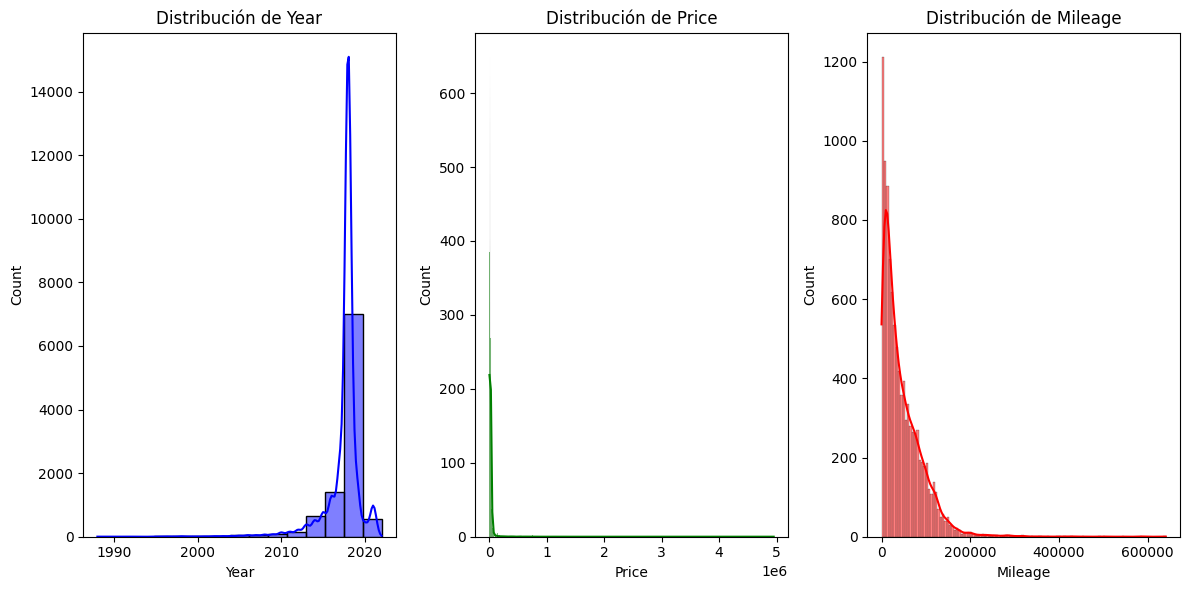

C:\Users\warre\AppData\Local\Temp\ipykernel_15164\4045209259.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sample, x='Fuel', palette='viridis')
C:\Users\warre\AppData\Local\Temp\ipykernel_15164\4045209259.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sample, x='Transmission', palette='viridis')


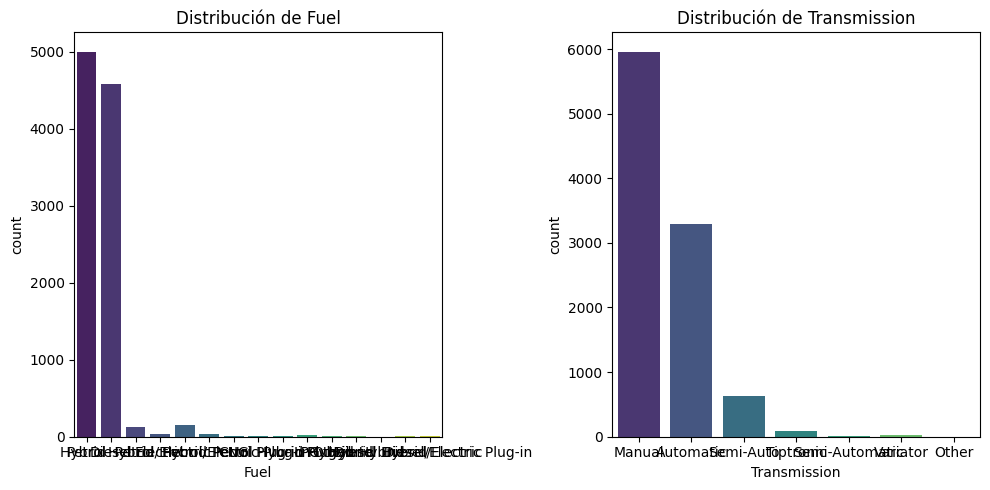

In [25]:
# Número de filas para la muestra aleatoria
sample_size = 10000

# Muestra aleatoria para las columnas numéricas
df_sample = df_fusion.sample(n=sample_size, random_state=42)

# Configuración para los gráficos
plt.figure(figsize=(12, 6))

# Histograma para 'Year', 'Price', y 'Mileage'
plt.subplot(1, 3, 1)
sns.histplot(df_sample['Year'], kde=True, color='blue')
plt.title('Distribución de Year')

plt.subplot(1, 3, 2)
sns.histplot(df_sample['Price'], kde=True, color='green')
plt.title('Distribución de Price')

plt.subplot(1, 3, 3)
sns.histplot(df_sample['Mileage'], kde=True, color='red')
plt.title('Distribución de Mileage')

plt.tight_layout()
plt.show()

# Gráficos de barras para columnas categóricas usando la muestra aleatoria
plt.figure(figsize=(10, 5))

# Gráfico para 'Fuel'
plt.subplot(1, 2, 1)
sns.countplot(data=df_sample, x='Fuel', palette='viridis')
plt.title('Distribución de Fuel')

# Gráfico para 'Transmission'
plt.subplot(1, 2, 2)
sns.countplot(data=df_sample, x='Transmission', palette='viridis')
plt.title('Distribución de Transmission')

plt.tight_layout()
plt.show()

# 4. Análisis conjunto de distribuciones
Este análisis compara las distribuciones de dos o más variables para ver cómo se relacionan entre sí.

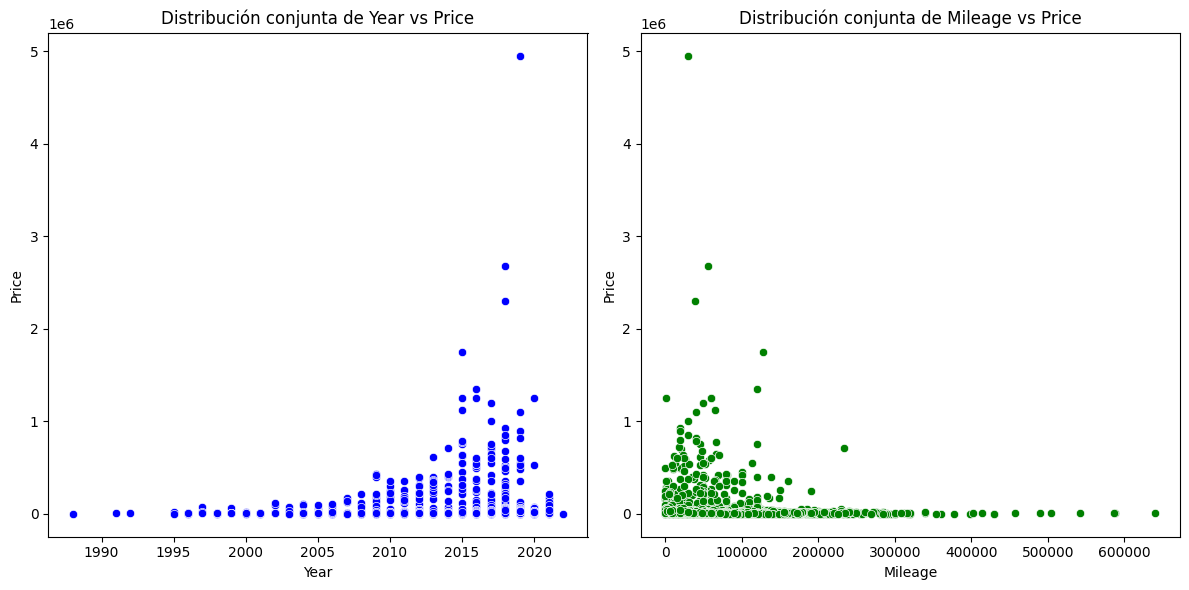

In [26]:
# Muestra aleatoria de 10,000 filas
df_sample = df_fusion.sample(n=10000, random_state=42)

# 1. Análisis conjunto de distribuciones (ejemplo: Year vs Price)
plt.figure(figsize=(12, 6))

# Gráfico de dispersión con la distribución de 'Year' y 'Price'
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_sample, x='Year', y='Price', color='blue')
plt.title('Distribución conjunta de Year vs Price')

# Gráfico de dispersión con la distribución de 'Mileage' y 'Price'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_sample, x='Mileage', y='Price', color='green')
plt.title('Distribución conjunta de Mileage vs Price')

plt.tight_layout()
plt.show()

# 5. Correlación entre las variables
Aquí calcularemos la correlación entre las columnas numéricas y visualizaremos la matriz de correlación utilizando un heatmap.

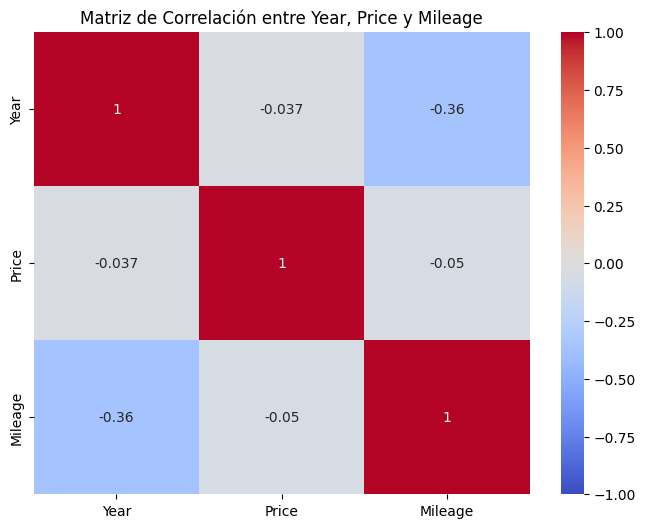

In [27]:
# 2. Correlación entre las variables numéricas
plt.figure(figsize=(8, 6))

# Correlación entre las columnas numéricas seleccionadas
correlation_matrix = df_sample[['Year', 'Price', 'Mileage']].corr()

# Visualización de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Year, Price y Mileage')
plt.show()

# 6. Otros hallazgos
En esta sección, puedes explorar cualquier otro hallazgo interesante en los datos. Un buen análisis podría ser la relación entre la variable Fuel y Price, o explorar alguna otra variable categórica que desees analizar en función de las numéricas.

C:\Users\warre\AppData\Local\Temp\ipykernel_15164\986448946.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample, x='Fuel', y='Price', palette='viridis')


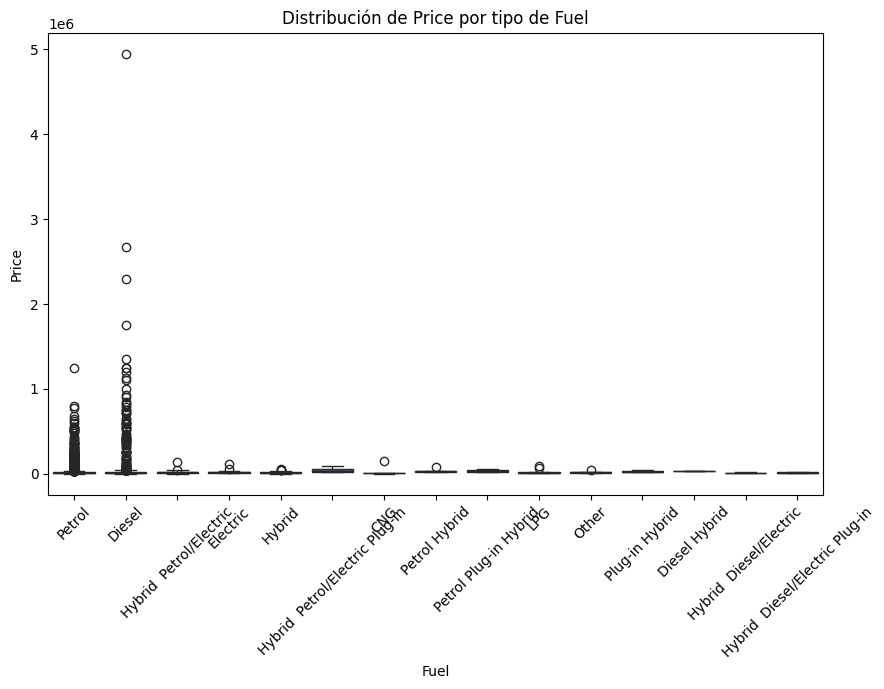

C:\Users\warre\AppData\Local\Temp\ipykernel_15164\986448946.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample, x='Transmission', y='Mileage', palette='viridis')


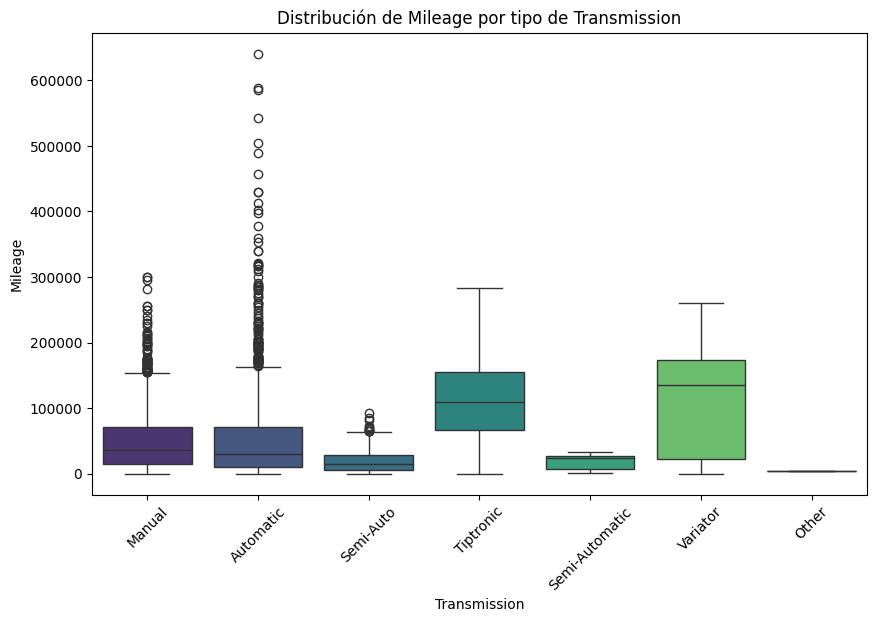

In [28]:
# 3. Otros hallazgos: Análisis de 'Fuel' vs 'Price'
plt.figure(figsize=(10, 6))

# Boxplot para ver cómo 'Price' se distribuye según el tipo de 'Fuel'
sns.boxplot(data=df_sample, x='Fuel', y='Price', palette='viridis')
plt.title('Distribución de Price por tipo de Fuel')
plt.xticks(rotation=45)
plt.show()

# 4. Otros hallazgos: Análisis de 'Transmission' vs 'Mileage'
plt.figure(figsize=(10, 6))

# Boxplot para ver cómo 'Mileage' se distribuye según el tipo de 'Transmission'
sns.boxplot(data=df_sample, x='Transmission', y='Mileage', palette='viridis')
plt.title('Distribución de Mileage por tipo de Transmission')
plt.xticks(rotation=45)
plt.show()